## Module 5, Lab 1: Healthcare Data

***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import statistics

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df1 = pd.read_csv("Mod5Lab1.csv", index_col="Unnamed: 0")

In [3]:
df1

,day,time,provider,duration (min)
1,M,8,Jessica,17.00
2,T,8,Jessica,14.80
3,W,8,Jessica,13.30
4,R,8,Jessica,15.10
5,F,8,Jessica,20.90
...,...,...,...,...
156,M,11:30,Benjamin,8.80
157,T,11:30,Benjamin,8.90
158,W,11:30,Benjamin,13.70
159,R,11:30,Benjamin,17.10


In [4]:
df1.groupby(by="provider").mean()

,duration (min)
provider,
Benjamin,10.96
Fatima,12.42
Haruto,9.32
Jessica,16.68


In [5]:
df1.groupby(by=["day","provider"]).mean()

duration (min)
day provider                
F   Benjamin           12.51
    Fatima             12.47
    Haruto             10.46
    Jessica            15.82
M   Benjamin           10.75
    Fatima             10.10
    Haruto              7.19
    Jessica            15.57
R   Benjamin           11.54
    Fatima             10.70
    Haruto             10.21
    Jessica            18.69
T   Benjamin           10.48
    Fatima             16.30
    Haruto             10.66
    Jessica            17.18
W   Benjamin            9.53
    Fatima             12.52
    Haruto              8.10
    Jessica            16.14

In [6]:
graph = df1.groupby(by=["day","provider"]).mean()

In [7]:
graph

duration (min)
day provider                
F   Benjamin           12.51
    Fatima             12.47
    Haruto             10.46
    Jessica            15.82
M   Benjamin           10.75
    Fatima             10.10
    Haruto              7.19
    Jessica            15.57
R   Benjamin           11.54
    Fatima             10.70
    Haruto             10.21
    Jessica            18.69
T   Benjamin           10.48
    Fatima             16.30
    Haruto             10.66
    Jessica            17.18
W   Benjamin            9.53
    Fatima             12.52
    Haruto              8.10
    Jessica            16.14

In [8]:
graph.reset_index(inplace=True)

In [9]:
graph.columns

Index(['day', 'provider', 'duration (min)'], dtype='object')

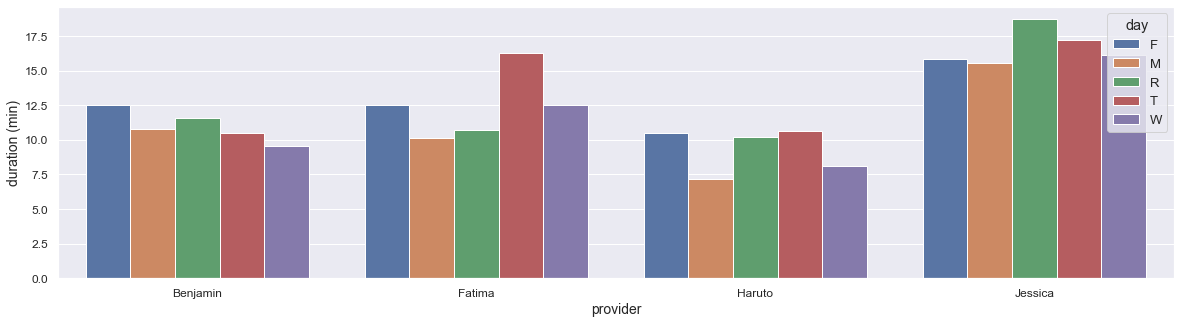

In [10]:
plt.figure(figsize=(20,5))
sns.barplot(x="provider", y="duration (min)", hue="day", data=graph)
plt.show()

### Module 5, Lab 2: Education Data

In [11]:
df2 = pd.read_csv("Mod5Lab2.csv")

In [12]:
df2

,overall.course,overall.instructor,rigor,inspired,clarity,class,level
0,3.00,4.00,3.00,4.00,4.00,Regression,Intro
1,1.00,1.00,2.00,1.00,2.00,Regression,Intro
2,2.00,2.00,4.00,2.00,2.00,Regression,Intro
3,4.00,4.00,3.00,3.00,3.00,Regression,Intro
4,5.00,5.00,5.00,4.00,5.00,Regression,Intro
...,...,...,...,...,...,...,...
265,4.50,4.50,3.50,1.50,4.50,Machine Learning,Advanced
266,4.50,4.50,5.00,3.50,5.00,Machine Learning,Advanced
267,4.50,3.50,3.50,4.50,5.00,Machine Learning,Advanced
268,3.50,3.50,3.50,4.50,3.50,Machine Learning,Advanced


In [13]:
graph2 = df2.groupby(by=["class","level"])['overall.course','overall.instructor'].mean()
graph2

overall.course  overall.instructor
class            level                                           
Machine Learning Advanced                3.44                3.62
                 Intermediate            1.50                1.71
                 Intro                   2.48                2.37
Regression       Advanced                2.96                3.11
                 Intermediate            4.67                4.67
                 Intro                   3.00                3.07

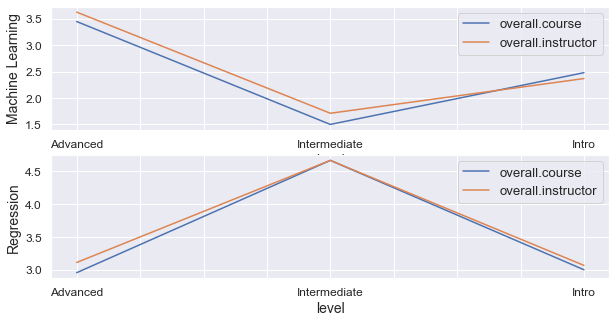

In [14]:
fig, ax = plt.subplots(2,1, figsize=(10,5))

graph2.xs("Machine Learning").plot(kind='line',ax=ax[0])
ax[0].set_ylabel("Machine Learning")
graph2.xs("Regression").plot(kind='line',ax=ax[1])
ax[1].set_ylabel("Regression")
plt.show()

#### Python code done by Dennis Lam